   Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0           0  2000-01-03                            1.5172   
1           1  2000-01-04                            1.5239   
2           2  2000-01-05                            1.5267   
3           3  2000-01-06                            1.5291   
4           4  2000-01-07                            1.5272   

  EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0               0.9847                              1.9033   
1                 0.97                              1.9238   
2               0.9676                              1.9339   
3               0.9686                              1.9436   
4               0.9714                               1.938   

  UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                    0.6146             1.805   
1                                    0.6109            1.8405   
2                                    0.6092          

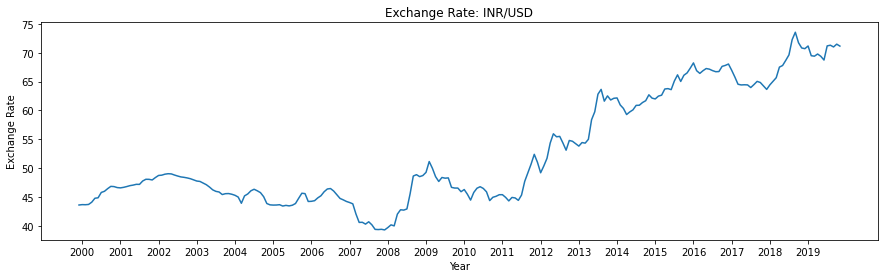

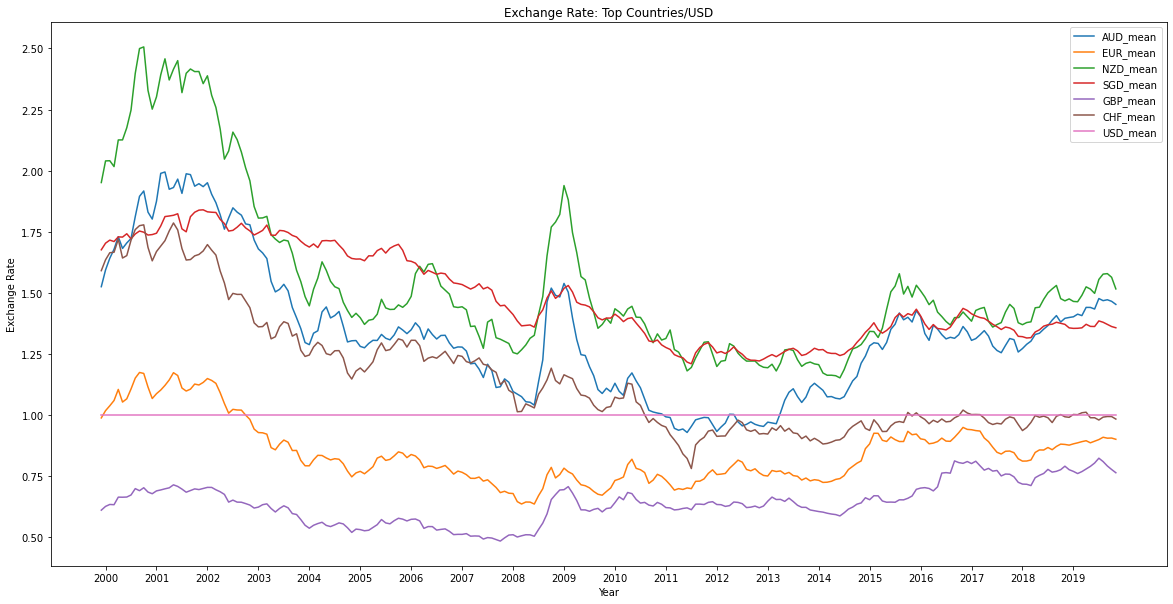

[1.5172 1.5239 1.5267 ... 1.4331 1.4278 1.4225]
[1.6563 1.6535 1.656  ... 1.352  1.3483 1.3446]
18.446225469774838
0.2964629828929901
0.08809997886419296
0.13731866820160868
0.8223009114319698


In [20]:
%run main.ipynb

In [21]:
inr_usd_fx = df_groupby_inr
inr_usd=df_groupby_inr['INR_USD']
y_fx=inr_usd

In [22]:
df1_india=pd.read_csv('m1_india.csv')
df1_usa=pd.read_csv('m1_usa.csv')
df1_usa.drop('DATE',axis=1, inplace=True)
df1=pd.concat([df1_india,df1_usa,y_fx],axis=1)
df1

,DATE,m1_india,m1_usa,INR_USD
0,01/01/00,3.360000e+12,1.122100e+12,43.589500
1,01/02/00,3.410000e+12,1.108600e+12,43.654000
2,01/03/00,3.340000e+12,1.107500e+12,43.638261
3,01/04/00,3.400000e+12,1.115600e+12,43.684700
4,01/05/00,3.420000e+12,1.104900e+12,44.075909
...,...,...,...,...
235,01/08/19,3.590000e+13,3.844000e+12,71.189091
236,01/09/19,3.650000e+13,3.887700e+12,71.311000
237,01/10/19,3.670000e+13,3.926100e+12,71.008636
238,01/11/19,3.650000e+13,3.955600e+12,71.494211


In [23]:
df1.m1_india=df1.m1_india/df1.INR_USD

In [24]:
df1.m1_india=df1.m1_india/1000000000
df1.m1_usa=df1.m1_usa/1000000000

In [25]:
df1=df1.set_index(['DATE'])
df1['diff_ms']=df1.m1_usa-df1.m1_india
df1

,m1_india,m1_usa,INR_USD,diff_ms
DATE,,,,
01/01/00,77.082784,1122.1,43.589500,1045.017216
01/02/00,78.114262,1108.6,43.654000,1030.485738
01/03/00,76.538339,1107.5,43.638261,1030.961661
01/04/00,77.830453,1115.6,43.684700,1037.769547
01/05/00,77.593408,1104.9,44.075909,1027.306592
...,...,...,...,...
01/08/19,504.290749,3844.0,71.189091,3339.709251
01/09/19,511.842493,3887.7,71.311000,3375.857507
01/10/19,516.838541,3926.1,71.008636,3409.261459


In [26]:
x_ticks = list(range(1, 252, 12))
x_ticklabels = [x for x in range(2000, 2021)]

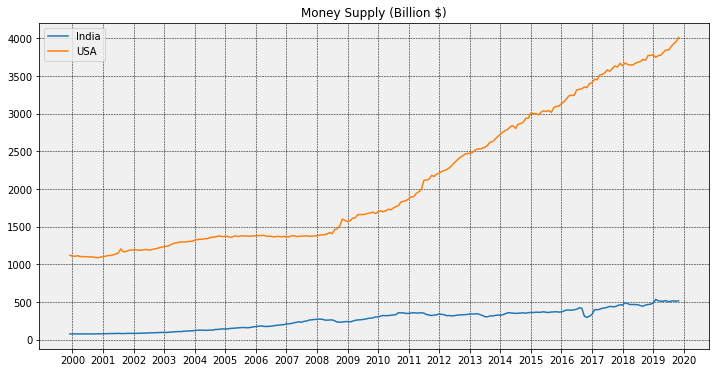

In [27]:
plt.figure(figsize=(12,6))
ax = plt.subplot()
plt.plot(x, df1['m1_india'])
plt.plot(x, df1['m1_usa'])
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)
ax.set_facecolor('#f1f0f0')
plt.legend(['India','USA'],facecolor='#f1f0f0')
plt.title("Money Supply (Billion $)")
# plt.xlabel("Year")
# plt.ylabel("Exchange Rate")
plt.grid(color='black',linestyle = '--', linewidth = 0.5)
plt.show()

In [28]:
df2_india=pd.read_csv('india_cpi.csv')
df2_usa=pd.read_csv('CPI_usa.csv')
df2_usa.drop('DATE',axis=1, inplace=True)
df2=pd.concat([df2_india,df2_usa],axis=1)
df2['diff_cpi']=df2['CPI_USA']-df2['CPI']
df2

,DATE,CPI,CPI_USA,diff_cpi
0,01/01/00,35.737043,71.218520,35.481477
1,01/02/00,35.654126,71.640431,35.986304
2,01/03/00,35.985793,72.231106,36.245313
3,01/04/00,36.317459,72.273297,35.955838
4,01/05/00,36.483292,72.357679,35.874387
...,...,...,...,...
235,01/08/19,122.409946,108.244556,-14.165390
236,01/09/19,123.175008,108.329360,-14.845648
237,01/10/19,124.322601,108.577022,-15.745579
238,01/11/19,125.470195,108.518798,-16.951396


In [29]:
df3_india=pd.read_csv('india_iip.csv')
df3_usa=pd.read_csv('iip_usa.csv')
df3_usa.drop('DATE',axis=1, inplace=True)
df3=pd.concat([df3_india,df3_usa],axis=1)
df3['diff_iip']=df3['IIP_USA']-df3['IIP']
df3

,DATE,IIP,IIP_USA,diff_iip
0,01/01/00,41.653969,91.7942,50.140231
1,01/02/00,41.087613,92.1272,51.039587
2,01/03/00,42.589432,92.4733,49.883868
3,01/04/00,42.798171,93.0619,50.263729
4,01/05/00,43.078591,93.3427,50.264109
...,...,...,...,...
235,01/08/19,115.107192,102.6882,-12.418992
236,01/09/19,115.814365,102.3143,-13.500065
237,01/10/19,119.240546,101.4645,-17.776046
238,01/11/19,115.157541,101.9876,-13.169941


In [30]:
df4_india=pd.read_csv('india_int.csv')
df4_usa=pd.read_csv('usa_int.csv')
df4_usa.drop('DATE',axis=1, inplace=True)
df4=pd.concat([df4_india,df4_usa],axis=1)
df4['diff_int']=df4['USA_INT']-df4['IND_INT']
df4

,DATE,IND_INT,USA_INT,diff_int
0,01/01/00,8.00,5.00,-3.00
1,01/02/00,8.00,5.24,-2.76
2,01/03/00,8.00,5.34,-2.66
3,01/04/00,7.00,5.50,-1.50
4,01/05/00,7.00,5.71,-1.29
...,...,...,...,...
235,01/08/19,5.65,2.75,-2.90
236,01/09/19,5.65,2.50,-3.15
237,01/10/19,5.40,2.25,-3.15
238,01/11/19,5.40,2.25,-3.15


In [31]:
month_year = inr_usd_fx['month_year']
month_year = month_year.astype(str)

In [32]:
df_input=pd.DataFrame({'diff_ms':np.array(df1.diff_ms),'diff_cpi':df2.diff_cpi,'diff_iip':df3.diff_iip,'diff_int':df4.diff_int})

In [33]:
df_input['DATE']=month_year
df_input=df_input.set_index(['DATE'])
df_input

,diff_ms,diff_cpi,diff_iip,diff_int
DATE,,,,
2000-01,1045.017216,35.481477,50.140231,-3.00
2000-02,1030.485738,35.986304,51.039587,-2.76
2000-03,1030.961661,36.245313,49.883868,-2.66
2000-04,1037.769547,35.955838,50.263729,-1.50
2000-05,1027.306592,35.874387,50.264109,-1.29
...,...,...,...,...
2019-08,3339.709251,-14.165390,-12.418992,-2.90
2019-09,3375.857507,-14.845648,-13.500065,-3.15
2019-10,3409.261459,-15.745579,-17.776046,-3.15


In [34]:
df_input['FOREX']=np.array(y_fx)

In [35]:
df_input

,diff_ms,diff_cpi,diff_iip,diff_int,FOREX
DATE,,,,,
2000-01,1045.017216,35.481477,50.140231,-3.00,43.589500
2000-02,1030.485738,35.986304,51.039587,-2.76,43.654000
2000-03,1030.961661,36.245313,49.883868,-2.66,43.638261
2000-04,1037.769547,35.955838,50.263729,-1.50,43.684700
2000-05,1027.306592,35.874387,50.264109,-1.29,44.075909
...,...,...,...,...,...
2019-08,3339.709251,-14.165390,-12.418992,-2.90,71.189091
2019-09,3375.857507,-14.845648,-13.500065,-3.15,71.311000
2019-10,3409.261459,-15.745579,-17.776046,-3.15,71.008636


IndexError: index 5 is out of bounds for axis 0 with size 5

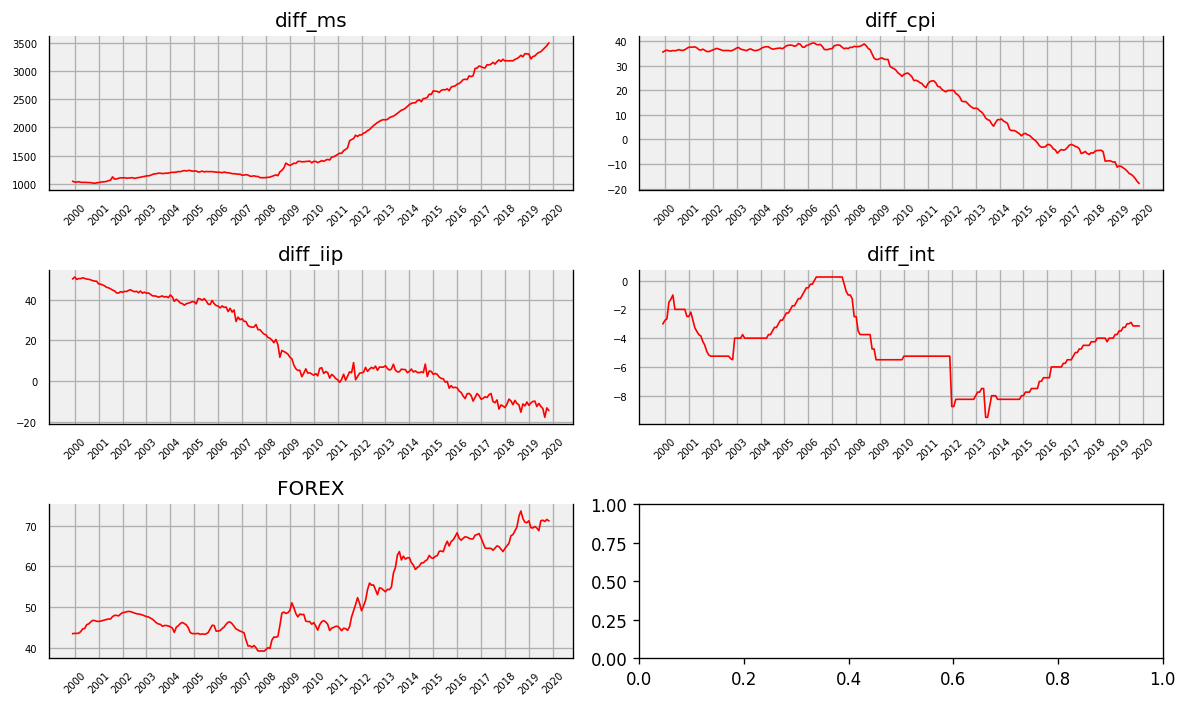

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_input[df_input.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_facecolor('#f1f0f0')
    ax.set_title(df_input.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels,rotation=45)
    ax.grid()
    plt.tight_layout()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df_input.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['diff_ms','diff_cpi','diff_iip','diff_int','FOREX'])

In [ ]:
df_scaled

,diff_ms,diff_cpi,diff_iip,diff_int,FOREX
0,0.014298,0.935590,0.986931,0.666667,0.126027
1,0.008446,0.944452,1.000000,0.691282,0.127908
2,0.008637,0.948999,0.983206,0.701538,0.127449
3,0.011379,0.943917,0.988726,0.820513,0.128803
4,0.007165,0.942487,0.988731,0.842051,0.140211
...,...,...,...,...,...
235,0.938417,0.064070,0.077846,0.676923,0.930837
236,0.952975,0.052128,0.062137,0.651282,0.934392
237,0.966427,0.036331,0.000000,0.651282,0.925575
238,0.980848,0.015163,0.066934,0.651282,0.939735


In [ ]:
n_obs=10
X_train, X_test = df_input[0:-n_obs], df_input[-n_obs:]
print(X_train.shape, X_test.shape)

(230, 5) (10, 5)


In [ ]:
transform_data_mid=X_train.diff().dropna()
transform_data=transform_data_mid.diff().dropna()
transform_data

,diff_ms,diff_cpi,diff_iip,diff_int,FOREX
DATE,,,,,
2000-03,15.007402,-0.245819,-2.055074,-0.14,-0.080239
2000-04,6.331962,-0.548484,1.535581,1.06,0.062178
2000-05,-17.270841,0.208024,-0.379482,-0.95,0.344770
2000-06,8.679398,0.295337,0.386409,0.08,0.293336
2000-07,2.375123,-0.293872,-0.699106,-1.29,-0.604500
...,...,...,...,...,...
2018-10,13.246915,-0.317979,-2.828709,-0.25,-1.363141
2018-11,-62.949736,-0.162999,7.578588,0.00,-3.105923
2018-12,82.729916,0.400251,-4.933402,0.25,0.918020


IndexError: index 5 is out of bounds for axis 0 with size 5

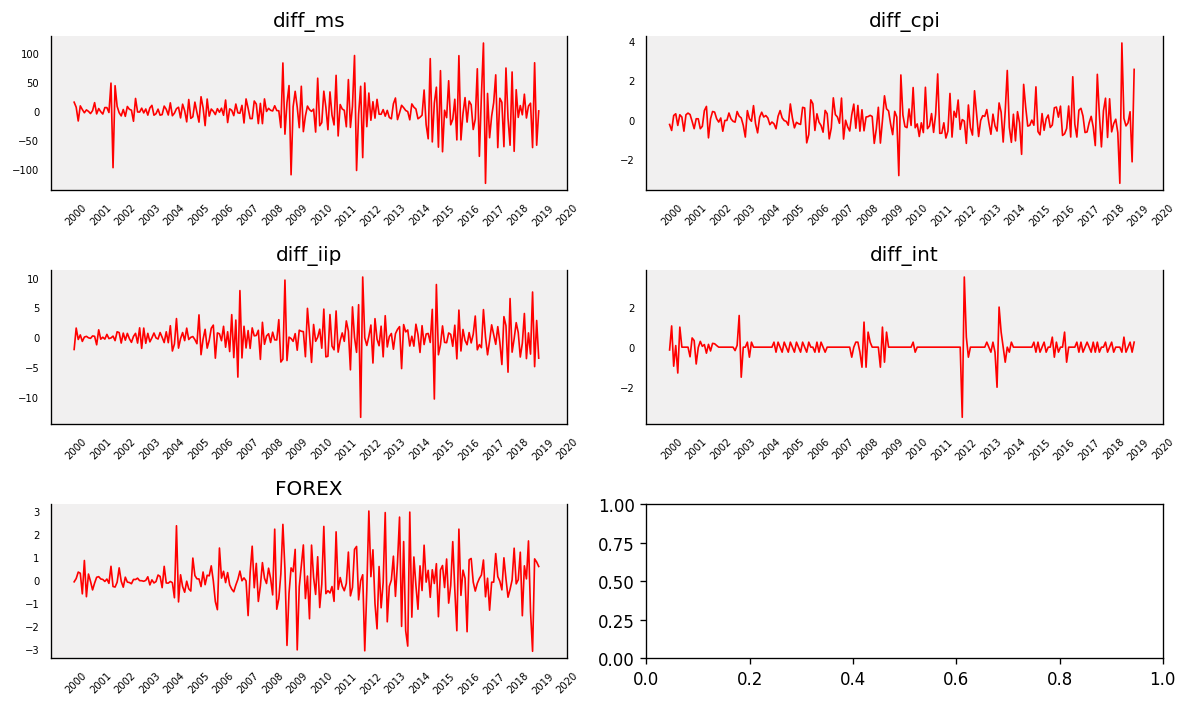

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = transform_data[transform_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_facecolor('#f1f0f0')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels,rotation=45)
    ax.set_title(transform_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
adf_test = adfuller(transform_data.diff_iip)
print('stat=%.3f, p=%.3f' % adf_test[0:2])
if adf_test[1] > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')

stat=-10.037, p=0.000
Probably Stationary


In [ ]:
kpss_test = kpss(transform_data['FOREX'], lags='auto')
print('stat=%.3f, p=%.3f' % kpss_test[0:2])
if kpss_test[1] > 0.05:
    print('Probably Stationary')
else:
    print('Probably not Stationary')

stat=0.098, p=0.100
Probably Stationary


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [ ]:
from statsmodels.tsa.api import VAR

model = VAR(transform_data)
for i in range(1,30):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic,'\n')

Lag Order = 1
AIC :  5.98244463055184 

Lag Order = 2
AIC :  5.072508021898114 

Lag Order = 3
AIC :  4.900062457474291 

Lag Order = 4
AIC :  4.741618205088668 

Lag Order = 5
AIC :  4.389743987804937 

Lag Order = 6
AIC :  4.466950380134534 

Lag Order = 7
AIC :  4.395174233965756 

Lag Order = 8
AIC :  4.304032776919725 

Lag Order = 9
AIC :  4.318710709584474 

Lag Order = 10
AIC :  4.291801638791922 

Lag Order = 11
AIC :  4.258909837647708 

Lag Order = 12
AIC :  4.3071860746797315 

Lag Order = 13
AIC :  4.278900520992542 

Lag Order = 14
AIC :  4.23824864261389 

Lag Order = 15
AIC :  4.188003221686529 

Lag Order = 16
AIC :  4.234375597696655 

Lag Order = 17
AIC :  4.379702046457669 

Lag Order = 18
AIC :  4.369143290438929 

Lag Order = 19
AIC :  4.315917558062905 

Lag Order = 20
AIC :  4.157372831585851 

Lag Order = 21
AIC :  4.171452682444418 

Lag Order = 22
AIC :  4.086617455999174 

Lag Order = 23
AIC :  3.9241126033858738 

Lag Order = 24
AIC :  3.872708050590113 

L

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
results = model.fit(maxlags=24, ic='aic')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Sep, 2021
Time:                     15:31:25
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    13.7132
Nobs:                     204.000    HQIC:                   7.85337
Log likelihood:          -1237.33    FPE:                    117.479
AIC:                      3.87271    Det(Omega_mle):         11.4471
--------------------------------------------------------------------
Results for equation diff_ms
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.551251         1.309487            0.421           0.674
L1.diff_ms          -0.745482         0.109330           -6.819           0.000
L1.diff_cpi         -4.457055         3.980404           -1.12

In [ ]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(results.resid)

for col, val in zip(transform_data.columns, out):
    print(col, ':', round(val, 2))

diff_ms : 1.99
diff_cpi : 2.01
diff_iip : 1.96
diff_int : 1.96
FOREX : 2.01


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=24
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

df_granger=grangers_causation_matrix(transform_data, variables = transform_data.columns)
df_granger

,diff_ms_x,diff_cpi_x,diff_iip_x,diff_int_x,FOREX_x
diff_ms_y,1.0000,0.0000,0.0138,0.2417,0.0036
diff_cpi_y,0.0000,1.0000,0.0976,0.0881,0.0144
diff_iip_y,0.0206,0.0049,1.0000,0.4490,0.1203
diff_int_y,0.0143,0.2587,0.0000,1.0000,0.0014
FOREX_y,0.0006,0.0009,0.0011,0.0022,1.0000


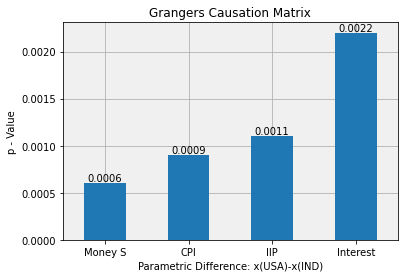

In [ ]:
row=df_granger.loc['FOREX_y'][:-1]
ax=row.plot(kind='bar',title='Grangers Causation Matrix',xlabel='Parametric Difference: x(USA)-x(IND)',
            ylabel='p - Value')
ax.set_xticklabels(['Money S','CPI','IIP','Interest'],rotation=0)
ax.set_facecolor('#f1f0f0')
for container in ax.containers:
    ax.bar_label(container)
ax.set_axisbelow(True)
plt.grid()
plt.show()

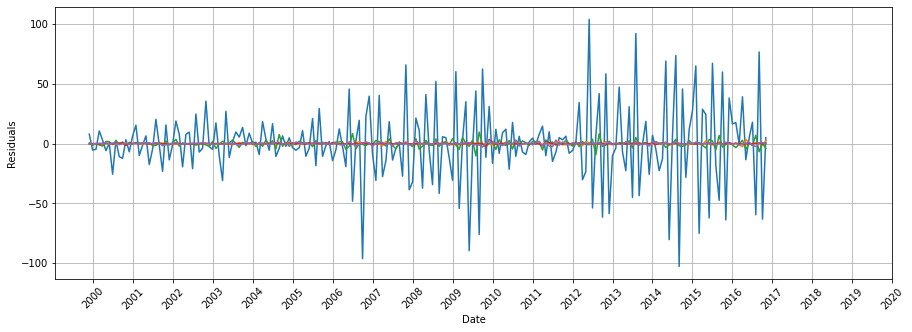

In [ ]:
y_fitted = results.fittedvalues
plt.figure(figsize = (15,5))
ax=plt.subplot()
# plt.plot(residuals, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels,rotation=45)
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [ ]:
# Get the lag order
lag_order = results.k_ar
print(lag_order)
# Input data for forecasting
input_data = transform_data.values[-lag_order:]
print(input_data)
# forecasting
pred = results.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred)

24
[[-8.99175664e+00 -6.21332500e-01  2.07261110e+00  2.50000000e-01
  -9.70251716e-02]
 [ 1.41960582e+01 -1.61027800e-01  4.37705600e-01  0.00000000e+00
  -9.31075515e-02]
 [ 6.19597115e+01  1.65668800e-01 -1.19247720e+00 -2.50000000e-01
   1.14841502e+00]
 [-6.30085054e+01 -3.77046200e-01  1.77363800e+00  2.50000000e-01
   1.45090909e-01]
 [ 2.17720546e+01 -1.31256030e+00 -8.16068600e-01 -2.50000000e-01
  -5.28181818e-02]
 [ 1.47155263e+01  2.29321880e+00 -4.57635460e+00  2.50000000e-01
  -4.31557312e-01]
 [-6.13670946e+01  2.39223300e-01  3.45055260e+00 -2.50000000e-01
   9.64978261e-01]
 [ 7.37097139e+01 -1.37936390e+00  1.92376780e+00  0.00000000e+00
   4.89751553e-02]
 [-1.22016614e+01  4.50880400e-01 -5.86054400e+00  0.00000000e+00
  -7.50428571e-01]
 [-5.89226359e+01  1.08388480e+00  6.48620960e+00  2.50000000e-01
  -4.06785714e-01]
 [ 6.69297429e+01 -9.02321200e-01 -2.50437970e+00 -2.50000000e-01
  -2.61904762e-04]
 [-6.93567995e+01  1.05519480e+00 -2.61020500e-01  0.00000000e

In [ ]:
def invert_transformation(s,pred):
    forecast = pred.copy()
    columns = s.columns
    for col in columns:
        forecast[str(col)+'_pred'] = s[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast

output = invert_transformation(transform_data_mid, pred)
output

,diff_ms_pred,diff_cpi_pred,diff_iip_pred,diff_int_pred,FOREX_pred
DATE,,,,,
2019-03,36.765650,-0.728168,1.938069,0.082552,0.207717
2019-04,17.874058,1.140369,-4.124923,0.647358,-2.732004
2019-05,9.153052,0.061327,3.710993,0.355600,-0.236125
2019-06,-7.799564,-1.389971,-0.694206,0.068705,-0.299822
2019-07,42.767536,-2.806701,-2.478241,0.119291,0.879617
2019-08,9.521121,0.805370,1.255128,0.729429,1.945732
2019-09,29.707017,-0.144605,0.946672,-0.496145,0.933729
2019-10,-20.901096,-0.212208,-4.008328,-0.280598,-0.745658
2019-11,5.397795,-1.548569,4.712964,0.232020,1.244599


In [ ]:
final=invert_transformation(X_train,output)
final

,diff_ms_pred,diff_cpi_pred,diff_iip_pred,diff_int_pred,FOREX_pred
DATE,,,,,
2019-03,3334.032315,-11.516319,-9.981907,-3.417448,71.381606
2019-04,3351.906373,-10.375950,-14.106830,-2.770090,68.649603
2019-05,3361.059425,-10.314623,-10.395837,-2.414490,68.413477
2019-06,3353.259862,-11.704594,-11.090043,-2.345784,68.113656
2019-07,3396.027398,-14.511295,-13.568284,-2.226494,68.993273
2019-08,3405.548519,-13.705925,-12.313156,-1.497064,70.939005
2019-09,3435.255536,-13.850530,-11.366484,-1.993209,71.872734
2019-10,3414.354440,-14.062738,-15.374812,-2.273808,71.127076
2019-11,3419.752235,-15.611307,-10.661847,-2.041788,72.371675


In [ ]:
combine = pd.concat([final['FOREX_pred'], X_test['FOREX']], axis=1)
combine = combine.round(decimals=2)
combine

,FOREX_pred,FOREX
DATE,,
2019-03,71.38,69.49
2019-04,68.65,69.41
2019-05,68.41,69.78
2019-06,68.11,69.39
2019-07,68.99,68.74
2019-08,70.94,71.19
2019-09,71.87,71.31
2019-10,71.13,71.01
2019-11,72.37,71.49


In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Forecast bias
forecast_errors = [combine['FOREX'][i]- combine['FOREX_pred'][i] for i in range(len(combine['FOREX']))]
bias = sum(forecast_errors) * 1.0/len(combine['FOREX'])
print('Bias: %f' % bias)

print('Mean absolute error:', mean_absolute_error(combine['FOREX'].values, combine['FOREX_pred'].values))
print('Mean squared error:', mean_squared_error(combine['FOREX'].values, combine['FOREX_pred'].values))
print('Root mean squared error:', math.sqrt(mean_squared_error(combine['FOREX'].values, combine['FOREX_pred'].values)))

Bias: -0.083000
Mean absolute error: 0.8150000000000006
Mean squared error: 0.9516500000000031
Root mean squared error: 0.9755254994104475


In [ ]:
df_input.to_csv('final_data.csv')